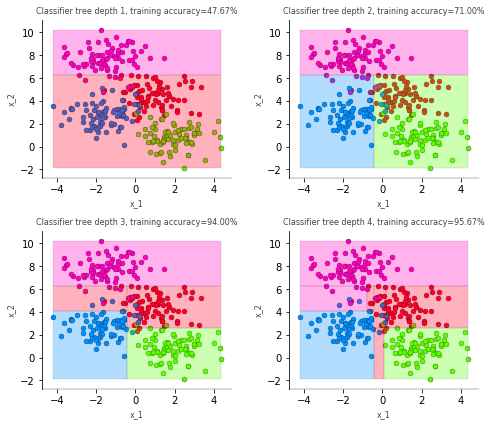

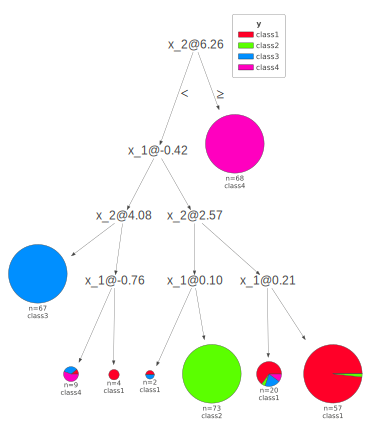

In [ ]:
from sklearn.datasets import make_blobs
from sklearn import tree
from dtreeviz.trees import *
import pandas as pd


# little hack for adjusting the color of the regions
base = plt.cm.get_cmap('gist_rainbow')
color_list = base(np.linspace(0, 1, 4))
color_list = color_list * 255
color_list = color_list.astype('int')
new_list = ["#{0:02x}{1:02x}{2:02x}".format(
    color_list[i][0], color_list[i][1], color_list[i][2]) for i in range(len(color_list[0]))]


my_colors = [None] + [new_list[0:i+1] for i in range(len(new_list))]
from dtreeviz.colors import adjust_colors
colors = adjust_colors(None)
colors['classes'] = my_colors
colors['rect_edge'] = '#000000'
colors['edge'] = '#000000'
colors['split_line'] = '#000000'
colors['wedge'] = '#000000'
colors['scatter_edge'] = '#000000'
colors['tesselation_alpha'] = 0.3

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
X = pd.DataFrame(X)
X.columns = ['x_1', 'x_2']
y = pd.DataFrame(y)
y.columns = ['y']
class_names = np.unique(y.values)
y = y['y'].map({n:i for i, n in enumerate(class_names)})

plt.close('all')
fig, ax = plt.subplots(2, 2, figsize=(7, 6))
for axi, depth  in zip(ax.reshape(-1,).tolist(), range(1, 5)):
    ct = ctreeviz_bivar(axi, X , y, max_depth=depth,
                    feature_names = ['x_1', 'x_2'],
                    class_names=['class1', 'class2', 'class3', 'class4'],
                    target_name='y',
                    fontsize=8,
                    show={'splits','title'})
plt.tight_layout(pad = 1)    
plt.show()


clsfr = tree.DecisionTreeClassifier(max_depth = 4)
clsfr.fit(X.values, y.values)
viz = dtreeviz(clsfr, X, y, target_name='y',
                   feature_names = ['x_1', 'x_2'],
                   class_names=['class1', 'class2', 'class3', 'class4'],
                   fancy = False
                   )
viz


<img alt="generated with latex" caption="Illustration of random forest" id="random_forest" src="../images/random_forest.png">


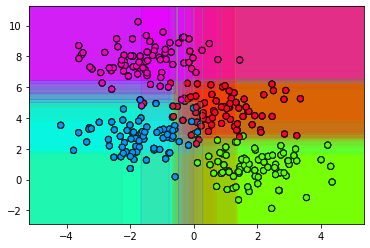

In [ ]:
######################################################################
## random forest
######################################################################
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from matplotlib.patches import Polygon
from itertools import chain
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
import matplotlib.animation as animation
import numpy as np
from IPython.display import HTML

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)

plot_step = 0.02 

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1 
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step)) 
n_estimators = 31 
  
mycmap=plt.cm.Paired
mycmap=plt.cm.Paired
colors = [mycmap(1), mycmap(3), mycmap(6), mycmap(9)]
base = plt.cm.get_cmap('gist_rainbow')
cmap = plt.cm.Reds
redc = (0.99, 0.96078431372549022, 0.94117647058823528, 0.1)

idx0 = np.where(y==0)[0]
idx1 = np.where(y==1)[0]
idx2 = np.where(y==2)[0]
idx3 = np.where(y==3)[0]


fig, ax = plt.subplots(1)
ax.scatter(X[:, 0], X[:, 1], c=y,  cmap=base, edgecolors = 'k')

def init():
    return []
         
clf = RandomForestClassifier(n_estimators = n_estimators,max_depth=3, warm_start=True)

def run(j):
    if j > n_estimators:
        return
    clf.set_params(n_estimators=j)
    clf.fit(X, y)    
    Z = clf.estimators_[j-1].predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.scatter(X[:, 0], X[:, 1], c = y, cmap=base, edgecolors = 'k')
    
    cont = ax.contourf(xx, yy, Z, cmap = base, alpha=0.1)

    return [cont]

ani = animation.FuncAnimation(fig, func = run, init_func = init, frames = chain((i + 1 for i in np.arange(0, n_estimators)), (n_estimators +1 for i in np.arange(0, 20))),
                       interval = 300,  blit = False) 
#ani.save('/home/martin/python/random_forest.gif', writer = 'imagemagick', fps = 2)
HTML(ani.to_jshtml())    

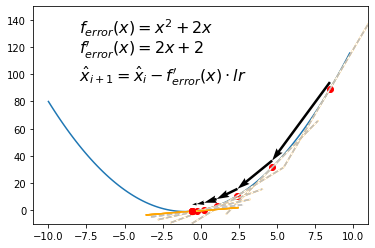

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import chain
import matplotlib.animation as animation
from IPython.display import HTML

x = np.arange(-10, 10, 0.2)
y = x**2 + 2*x

fig, axes= plt.subplots()
#axes=fig.add_subplot(111)
axes.set_xlim([-11, 11])
axes.set_ylim([-10, 150])
axes.plot(x,y)
axes.annotate(xy=(-8, 130), s = '$f_{error}(x) = x^2 + 2x$', fontsize=16)
axes.annotate(xy=(-8, 115), s = '$f_{error}\'(x) = 2x + 2$', fontsize=16)
axes.annotate(xy=(-8, 95), s = '$\hat{x}_{i+1} = \hat{x}_i - f_{error}\'(x) \cdot lr$', fontsize=16)

# function and derivative
f = lambda x : x**2 + 2*x
f_ = lambda x : 2*x + 2

w = [8.5]

def init():
    return []

alpha = 0.2
iter = 1

def run(j):   
    

    if j > 1:
        axes.plot([w[-2]-3, w[-2]+3], [f(w[-2]) - 3*f_(w[-2]), f(w[-2]) + 3*f_(w[-2])], color='white',
              linestyle = '-')
        axes.plot([w[-2]-3, w[-2]+3], [f(w[-2]) - 3*f_(w[-2]), f(w[-2]) + 3*f_(w[-2])], color='grey',
              linestyle = '--', alpha = 0.5 )
    axes.plot([w[-1]-3, w[-1]+3], [f(w[-1]) - 3*f_(w[-1]), f(w[-1]) + 3*f_(w[-1])], color='orange',
              linestyle = '-')

        
    axes.plot(w[-1], f(w[-1]), 'ro')
    new_w = w[-1] - alpha * f_(w[-1])

    if abs(new_w -w[-1]) < 0.2:
        return
    w.append(new_w)
    axes.quiver(w[-2], f(w[-2])+ 5, -alpha * f_(w[-2]), f(w[-1])- f(w[-2]),
               scale_units='xy', angles='xy', scale=1)
    return axes

ani = animation.FuncAnimation(fig, func = run, init_func = init,
                              frames = (i+1 for i in range(10)),
                       interval = 1000,  blit = False) 
HTML(ani.to_jshtml())


<img alt="generated with latex" caption="The gradient boosting algorithm" id="gradient_boosting" src="../images/gbm.png">